In [1]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./dataset-0506"]).decode("utf8")) #check the files available in the directory

fields.pdf
submit_test.csv
test.csv
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('./dataset-0506/train.csv')
test = pd.read_csv('./dataset-0506/test.csv')
print(train.shape,'->',test.shape)

(60000, 235) -> (10000, 234)


In [3]:
##display the first five rows of the train dataset.
train.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,nan,...,58,1,157,1,2483,1,6011,1,34.470,647603.770
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,nan,...,28,1,115,1,15872,1,32221,1,40.074,3321452.000
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,nan,...,78,1,212,1,15760,1,32228,1,54.462,9570885.316
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,nan,...,20,1,125,1,2568,1,7271,1,99.629,14215011.127
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,nan,...,18,1,47,1,2587,1,7442,1,124.131,762711.976


In [4]:
##display the first five rows of the test dataset.
test.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,nan,...,7,21,1,129,1,3991,1,8409,1,105.462
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,nan,...,18,44,1,67,1,1950,1,10725,1,100.820
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,nan,...,0,3,1,35,1,3707,1,19459,1,259.801
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,nan,...,16,60,1,144,1,6487,1,29400,1,22.942
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,nan,...,4,18,1,76,1,1346,1,3280,1,181.213


**Save and Remove Building ID**

In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'building_id' column
train_ID = train['building_id']
test_ID = test['building_id']

#Now drop the  'building_id' colum since it's unnecessary for  the prediction process.
train.drop("building_id", axis = 1, inplace = True)
test.drop("building_id", axis = 1, inplace = True)

#check again the data size after dropping the 'building_id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (60000, 235) 
The test data size before dropping Id feature is : (10000, 234) 

The train data size after dropping Id feature is : (60000, 234) 
The test data size after dropping Id feature is : (10000, 233) 


In [6]:
print(train.describe())

       building_material      city    txn_dt  total_floor  building_type  \
count          60000.000 60000.000 60000.000    60000.000      60000.000   
mean               7.268    11.415 19488.958        7.638          1.932   
std                2.171     4.752   727.331        5.070          1.590   
min                1.000     3.000 18112.000        1.000          0.000   
25%                8.000     7.000 18892.750        4.000          0.000   
50%                8.000    12.000 19527.000        5.000          1.000   
75%                8.000    13.000 20125.000       12.000          4.000   
max               11.000    21.000 20665.000       29.000          4.000   

       building_use  building_complete_dt  parking_way  parking_area  \
count     60000.000             60000.000    60000.000      3103.000   
mean          2.319             11050.437        1.586         7.212   
std           1.400              4344.018        0.779        20.454   
min           0.000        

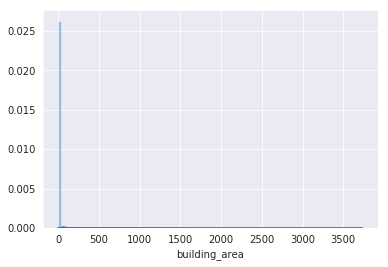

In [7]:
# Important feature ('building_area', 943)
sns.distplot(train['building_area'],hist=True,bins=100)

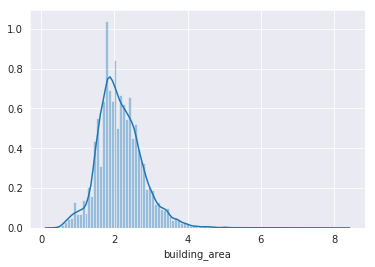

In [8]:
sns.distplot(np.log1p(train['building_area']),hist=True,bins=100)

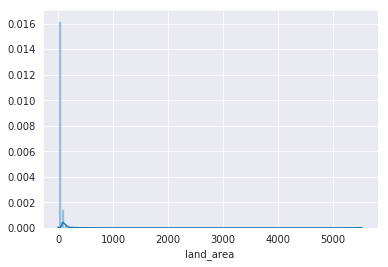

In [9]:
# Important feature ('land_area', 869)
sns.distplot(train['land_area'],hist=True,bins=100)

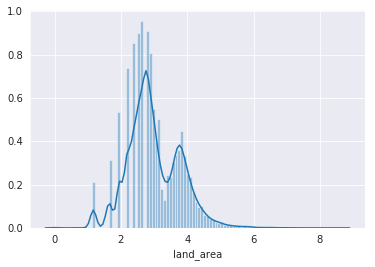

In [10]:
sns.distplot(np.log1p(train['land_area']),hist=True,bins=100)

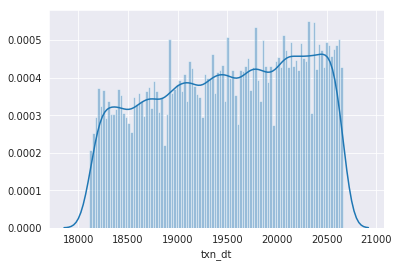

In [11]:
# Important feature ('txn_dt', 471)
sns.distplot(train['txn_dt'],hist=True,bins=100)

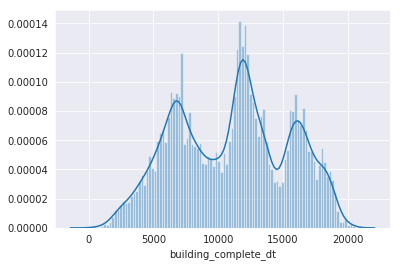

In [12]:
# Important feature ('building_complete_dt', 466)
sns.distplot(train['building_complete_dt'],hist=True,bins=100)

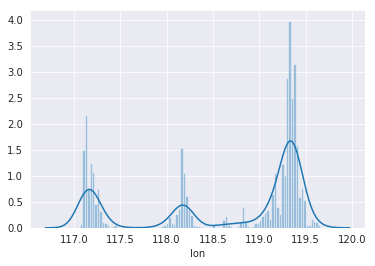

In [13]:
# Important feature ('lon', 307)
sns.distplot(train['lon'],hist=True,bins=100)

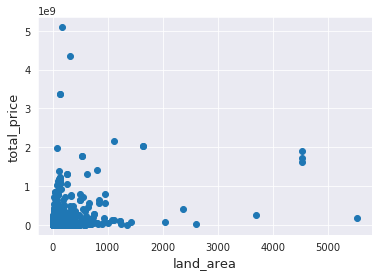

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = train['land_area'], y = train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('land_area', fontsize=13)
plt.show()

# Data Preprocess

## target variable process
**Log-transformation of the target variable**

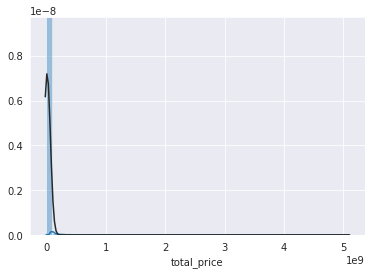

In [15]:
sns.distplot(train['total_price'] , fit=norm);

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["total_price"] = np.log1p(train["total_price"])

# 特徵工程 Features engineering

In [17]:
# concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['total_price'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['total_price'], axis=1, inplace=True)
print(f"all_data size is : {all_data.shape}, y_train size: {y_train.shape}")

all_data size is : (70000, 233), y_train size: (60000,)


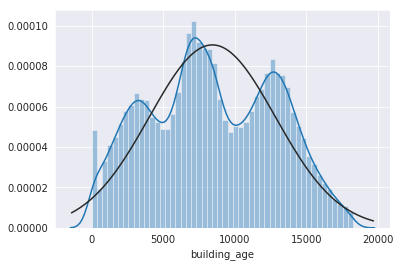

In [18]:
# txn_dt - building_complete_dt
all_data['building_age'] = (all_data['txn_dt'] - all_data['building_complete_dt'])
sns.distplot(all_data['building_age'] , fit=norm);

In [19]:
all_data['land_area'] = np.log1p(all_data['land_area'])
all_data['building_area'] = np.log1p(all_data['building_area'])

**Data Correlation**

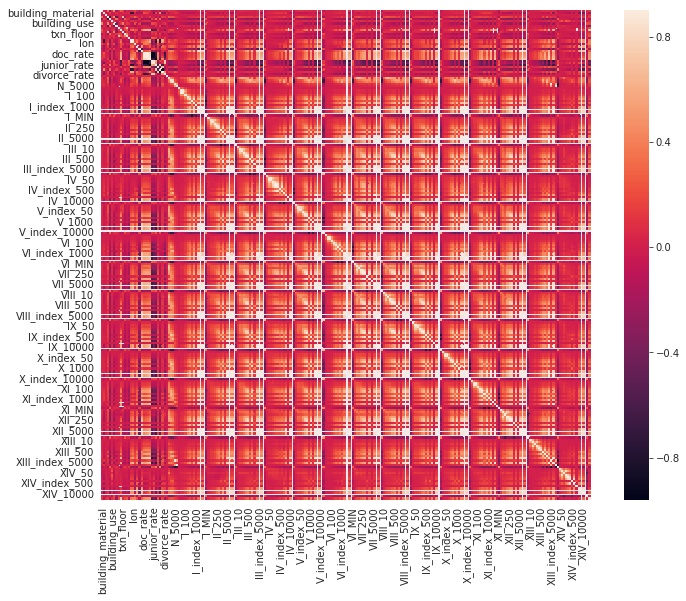

In [20]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
# building_material 建材
# building_use 建物用途
# txn_floor 交易樓層
# lon 建物經度
# doc_rate 博士教育程度人口占比
# junior_rate 所在縣市國中教育程度人口占比

## 填補缺失值

In [21]:
# 檢查欄位缺值數量 (去掉.head()可以顯示全部)
all_data.isnull().sum().sort_values(ascending=False).head()

parking_area             66397
parking_price            53775
txn_floor                18541
village_income_median     1326
building_age                 0
dtype: int64

In [22]:
# figure all missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
# missing features
# parking_area    94% 車位面積
# parking_price   76% 車位價格
# txn_floor       26% 交易樓層
# village_income_median 1.89% 里年收入中位數

,Missing Ratio
parking_area,94.853
parking_price,76.821
txn_floor,26.487
village_income_median,1.894


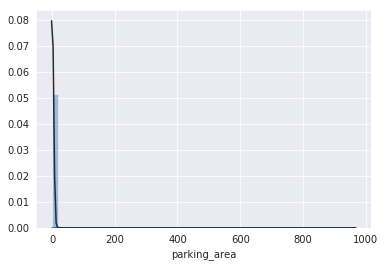

In [23]:
# Handle Missing Features parking_area
all_data["parking_area"] = all_data["parking_area"].fillna(0)

#Check the new distribution 
sns.distplot(all_data['parking_area'] , fit=norm);

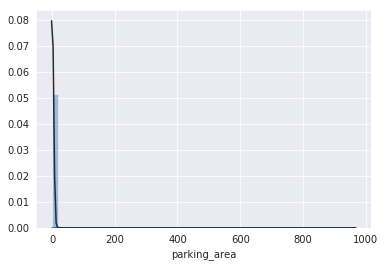

In [24]:
all_data["parking_price"] = all_data["parking_price"].fillna(0)

#Check the new distribution 
sns.distplot(all_data['parking_area'] , fit=norm);

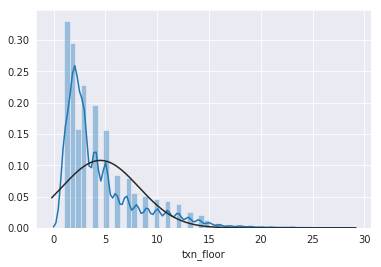

In [25]:
all_data["txn_floor"] = all_data["txn_floor"].fillna((all_data["total_floor"]+1)/2.0)

#Check the new distribution 
sns.distplot(all_data['txn_floor'] , fit=norm);

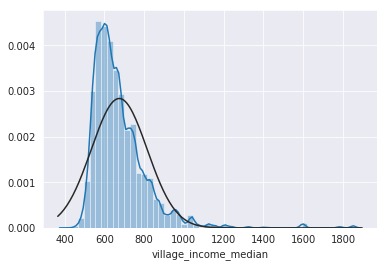

In [26]:
all_data["village_income_median"]  = all_data['village_income_median'].fillna(axis=0, method='ffill')

#Check the new distribution 
sns.distplot(all_data['village_income_median'] , fit=norm);

## 數值型特徵
**去離群值**
**去偏態**
**特徵縮放**

In [27]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(all_data.dtypes, all_data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
# print(f'{len(num_features)} Numeric Features : {num_features}\n')

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import time
from sklearn.ensemble import GradientBoostingRegressor

x_train = all_data[:ntrain]

# estimator = LinearRegression()
# cross_val_score(estimator, x_train, y_train, cv=5).mean()

# estimator = GradientBoostingRegressor()
# start = time.time()
# print(f'shape : {x_train.shape}')
# print(f'score : {cross_val_score(estimator, x_train, y_train, cv=5).mean()}')
# print(f'time : {time.time() - start} sec')
# shape : (60000, 234)
# score : 0.9336887325748057
# time : 204.60381722450256 sec

**Skewed features**

In [29]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
parking_area,151.993
VI_10,28.645
XIII_10,27.478
XIII_50,18.478
IV_10,17.640
X_10,17.427
XIII_100,16.426
I_10,15.265
XI_10,14.500
XIII_250,12.101


In [30]:
# cols = ('building_area','land_area','VI_10','XIII_10','XIII_50','IV_10','X_10','XIII_100','town_area','town_population')
# for feature_name in num_features:
#     if (feature_name != 'building_type' and feature_name!='building_use'):
#         mean_value = all_data[feature_name].mean()
#         std_value = all_data[feature_name].std()
#         all_data[feature_name] = (all_data[feature_name] - mean_value) / std_value
    
# all_data.head()

## 類別型特徵
**類別型特徵處理理**

In [31]:
# Label Encoding some categorical variable
from sklearn.preprocessing import LabelEncoder
cols = ['building_type', 'building_use']
for feature in cols:
    print(all_data[feature].unique())
    all_data[feature] = all_data[feature].astype(str)

print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

[3 1 0 4 2]
[ 2  1  6 10  8  5  0  3  4  7]
(70000, 234)
(70000, 247)


In [32]:
# x_train = all_data[:ntrain]
# estimator = GradientBoostingRegressor()
# start = time.time()
# print(f'shape : {x_train.shape}')
# print(f'score : {cross_val_score(estimator, x_train, y_train, cv=5).mean()}')
# print(f'time : {time.time() - start} sec')
# shape : (60000, 247)
# score : 0.9340604080394396
# time : 208.69866728782654 sec

## 時間型特徵
**時間特徵分解**
**週期循環特徵**

# Build ML Model

In [33]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance
from collections import OrderedDict
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [34]:
enable_ml = True
x_train = all_data[:ntrain]

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
if (enable_ml) :
    start = time.time()
    print(f'shape : {x_train.shape}')
    model_xgb.fit(x_train, y_train)
    print(f'time : {time.time() - start} sec')
    

shape : (60000, 247)
time : 401.30112528800964 sec


OrderedDict([('building_area', 935), ('land_area', 861), ('building_complete_dt', 467), ('txn_dt', 466), ('village_income_median', 398), ('building_age', 339), ('lon', 312), ('total_floor', 258), ('lat', 245), ('XIV_5000', 238), ('txn_floor', 235), ('XIV_10000', 220), ('town', 218), ('XIII_10000', 195), ('town_population', 184), ('XIV_1000', 183), ('XII_MIN', 175), ('town_area', 173), ('XIII_5000', 171), ('X_MIN', 171), ('village', 171), ('XI_MIN', 170), ('IV_MIN', 170), ('VIII_MIN', 164), ('parking_price', 158), ('I_10000', 156), ('IV_5000', 148), ('XIII_MIN', 147), ('II_MIN', 144), ('I_MIN', 139), ('IX_MIN', 138), ('town_population_density', 134), ('III_MIN', 133), ('XIV_500', 128), ('V_MIN', 124), ('XIV_MIN', 120), ('VII_1000', 118), ('VI_MIN', 114), ('XI_10000', 113), ('I_5000', 112), ('VII_MIN', 110), ('XI_5000', 106), ('VIII_1000', 105), ('VI_5000', 102), ('parking_way', 101), ('building_type_4', 100), ('II_5000', 100), ('III_1000', 99), ('IV_10000', 99), ('XII_1000', 98), ('buil

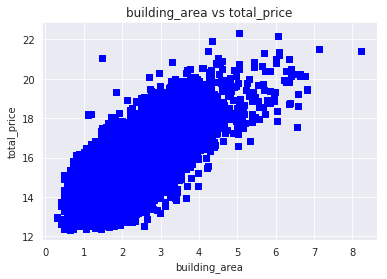

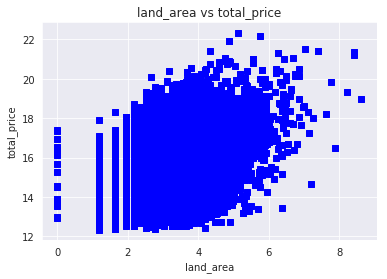

In [35]:
# https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression
if (enable_ml) :
    # save most important features
    most_relevant_features = OrderedDict(sorted(model_xgb.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
    print(most_relevant_features)
    plt.scatter(x_train.building_area, y_train, c = "blue", marker = "s")
    plt.title("building_area vs total_price")
    plt.xlabel("building_area")
    plt.ylabel("total_price")
    plt.show()
    
    plt.scatter(x_train.land_area, y_train, c = "blue", marker = "s")
    plt.title("land_area vs total_price")
    plt.xlabel("land_area")
    plt.ylabel("total_price")
    plt.show()

In [36]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

if (enable_ml) :
    start = time.time()
    xgb_train_pred = model_xgb.predict(x_train)
    print(f'time : {time.time() - start} sec')
    print(rmsle(y_train, xgb_train_pred))

time : 4.4781272411346436 sec
0.20291836178177383


# Predict with ML

In [37]:
test = all_data[ntrain:]

if (enable_ml) :
    start = time.time()
    print(f'shape : {test.shape}')
    xgb_pred = model_xgb.predict(test)
    print(f'time : {time.time() - start} sec')

shape : (10000, 247)
time : 0.7026727199554443 sec


In [38]:
if (enable_ml) :
    xgb_pred = np.expm1(xgb_pred)

In [39]:
if (enable_ml) :
    sub = pd.DataFrame()
    sub['building_id'] = test_ID
    sub['total_price'] = xgb_pred
    sub.to_csv('submission_xgb.csv',index=False)

# Build DNN Model

In [40]:
import tensorflow as tf
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras import losses

# simple early stopping
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_mean_squared_error', save_best_only=True, verbose=1)

batch_size = 60
epochs = 3000
lr = 0.01
train_ratio = 0.9

model = Sequential()
model.add(Dense(256, input_shape=(247,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) 

print(model.summary())
model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics=[metrics.mse])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               63488     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
__________

In [41]:
x_train = all_data[:ntrain]

model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs, shuffle=True,
                          validation_split=1 - train_ratio,
                          callbacks=[earlystop,checkpoint])


Train on 54000 samples, validate on 6000 samples
Epoch 1/3000
54000/54000 [==============================] - 6s 118us/step - loss: 54.7544 - mean_squared_error: 54.7544 - val_loss: 3.0825 - val_mean_squared_error: 3.0825

Epoch 00001: val_mean_squared_error improved from inf to 3.08253, saving model to best_model.h5
Epoch 2/3000
54000/54000 [==============================] - 5s 87us/step - loss: 9.8563 - mean_squared_error: 9.8563 - val_loss: 1.5323 - val_mean_squared_error: 1.5323

Epoch 00002: val_mean_squared_error improved from 3.08253 to 1.53235, saving model to best_model.h5
Epoch 3/3000
54000/54000 [==============================] - 5s 88us/step - loss: 8.0011 - mean_squared_error: 8.0011 - val_loss: 1.4087 - val_mean_squared_error: 1.4087

Epoch 00003: val_mean_squared_error improved from 1.53235 to 1.40873, saving model to best_model.h5
Epoch 4/3000
54000/54000 [==============================] - 5s 86us/step - loss: 7.0040 - mean_squared_error: 7.0040 - val_loss: 1.2873 - val_

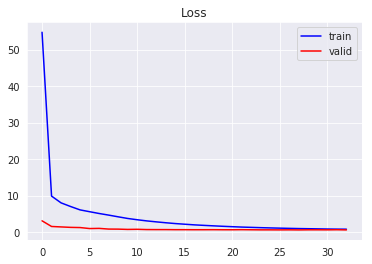

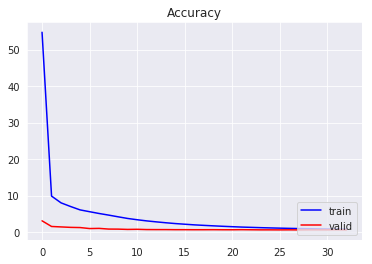

In [42]:
train_loss = model_history.history['loss']
train_acc = model_history.history['mean_squared_error']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_mean_squared_error']
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [43]:
# load the saved model
from tensorflow.keras.models import load_model
from tensorflow.keras import losses

saved_model = load_model('best_model.h5')

In [44]:
y_train_predict = saved_model.predict(x_train)
print(rmsle(y_train, y_train_predict))
# Baseline XGB 0.20298269926778068

0.7545634753299763


In [45]:
y_predict = saved_model.predict(test)
y_predict.shape

(10000, 1)

In [46]:
y_predict = np.expm1(y_predict)
y_predict

array([[ 9125407. ],
       [ 5574016. ],
       [13363773. ],
       ...,
       [ 1529295.4],
       [ 5297866. ],
       [ 2335153.2]], dtype=float32)

In [47]:
sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = y_predict
sub.to_csv('submission_nn.csv',index=False)